# string model 2 complexes

In [1]:
import boolean_model_helper as bm
import string_model_drawer as draw
from string_model_builder_2 import string2definition, add_processes2definition, add_mtb2definition

In [9]:
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']
complexes = ['ESCRT_complexes', 'MHC_I_complexes', 'vATPase_complexes']

In [17]:
definition = string2definition('string-network-1.csv', 'string-1-complex-map.csv')
definition = add_processes2definition(definition, 'string-1-process-edgelist.csv', 'string-1-complex-map.csv')
hit = [factor for factor in hit if factor in definition]
print definition

added: ['Phagosome_acidification', 'Phagosome_maturation', 'Phagolysosome_assembly']
#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True
ESCRT_complexes = True
MHC_I_complexes = True
vATPase_complexes = True

#rules
NUTF2 *= RAN or KPNB1 or KPNA2
CD1D *= MHC_I_complexes or CD1B
CD1B *= CD1D or MHC_I_complexes
KLRD1 *= KLRC1 or MHC_I_complexes
HIP1R *= AP1B1 or ESCRT_complexes
XPO1 *= RAN or ESCRT_complexes
XPO5 *= RAN
VPS

1 mtb on/off

In [11]:
mtb_off = add_mtb2definition(definition, 'mtb-edgelist.csv', False)
mtb = [factor for factor in mtb if factor in mtb_off]
mtb


added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


['esxA', 'esxH_esxG', 'ndkA', 'PPE2', 'PtpA', 'SapM']

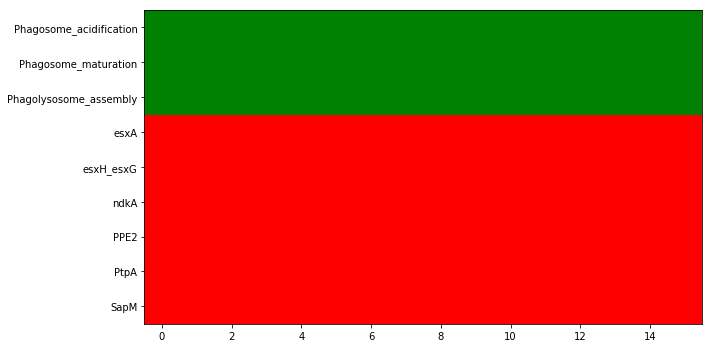

In [12]:
model = bm.run_model(mtb_off)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + mtb)

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


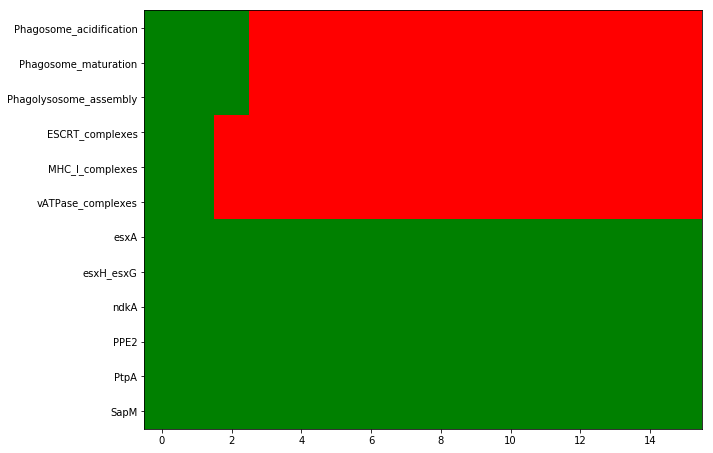

In [14]:
mtb_on = add_mtb2definition(definition, 'mtb-edgelist.csv', 'True')
model = bm.run_model(mtb_on)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + complexes + mtb)

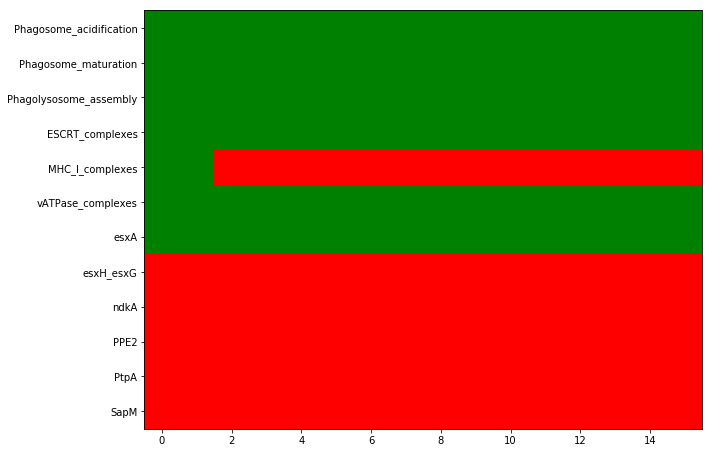

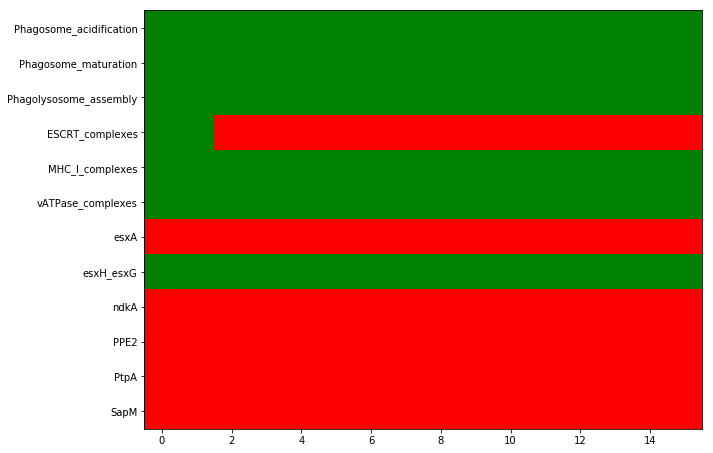

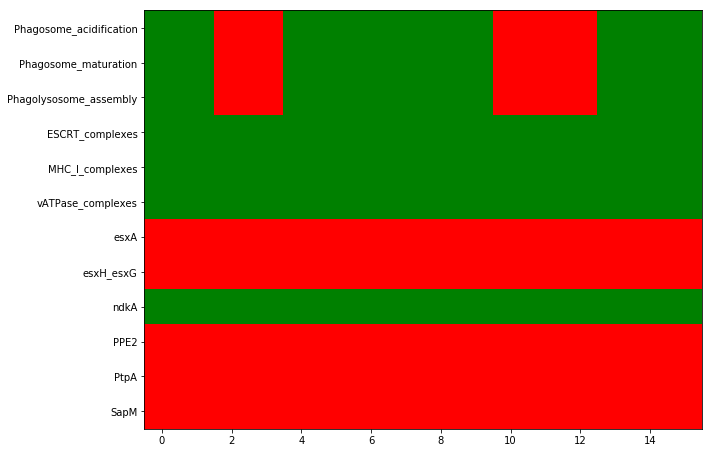

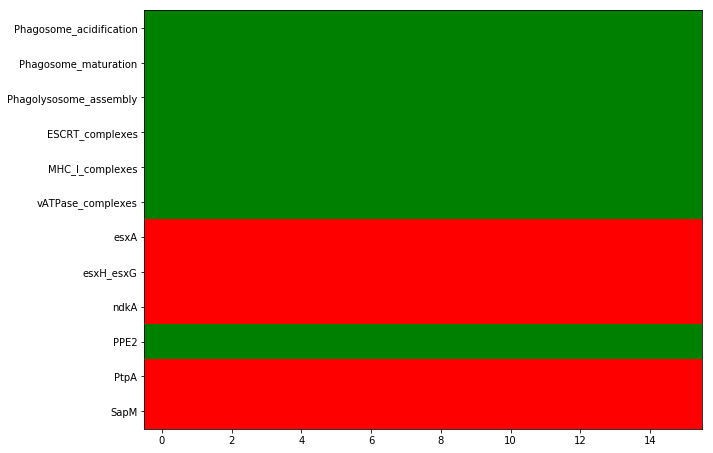

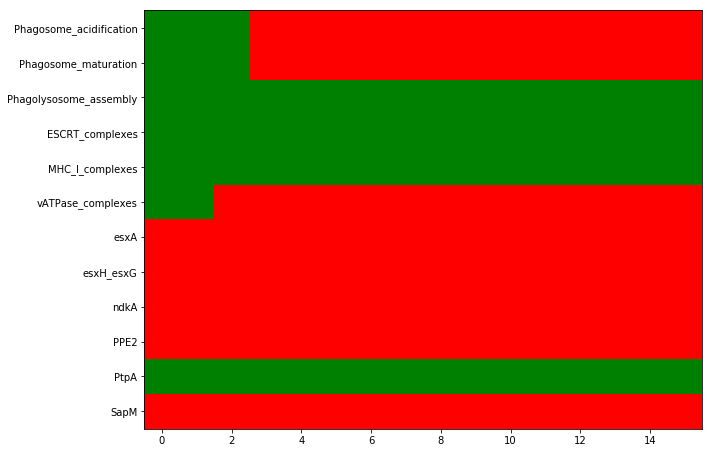

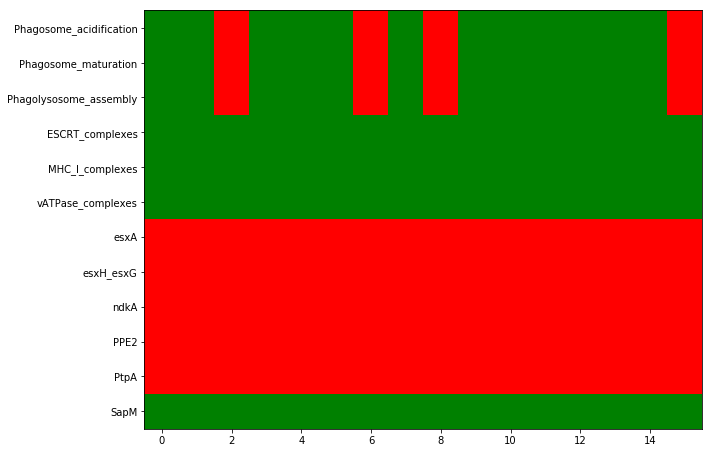

In [15]:
for factor in mtb:
    mtb_test = bm.switch(mtb_off, on=[factor])
    model = bm.run_model(mtb_test)
    bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + complexes + mtb)

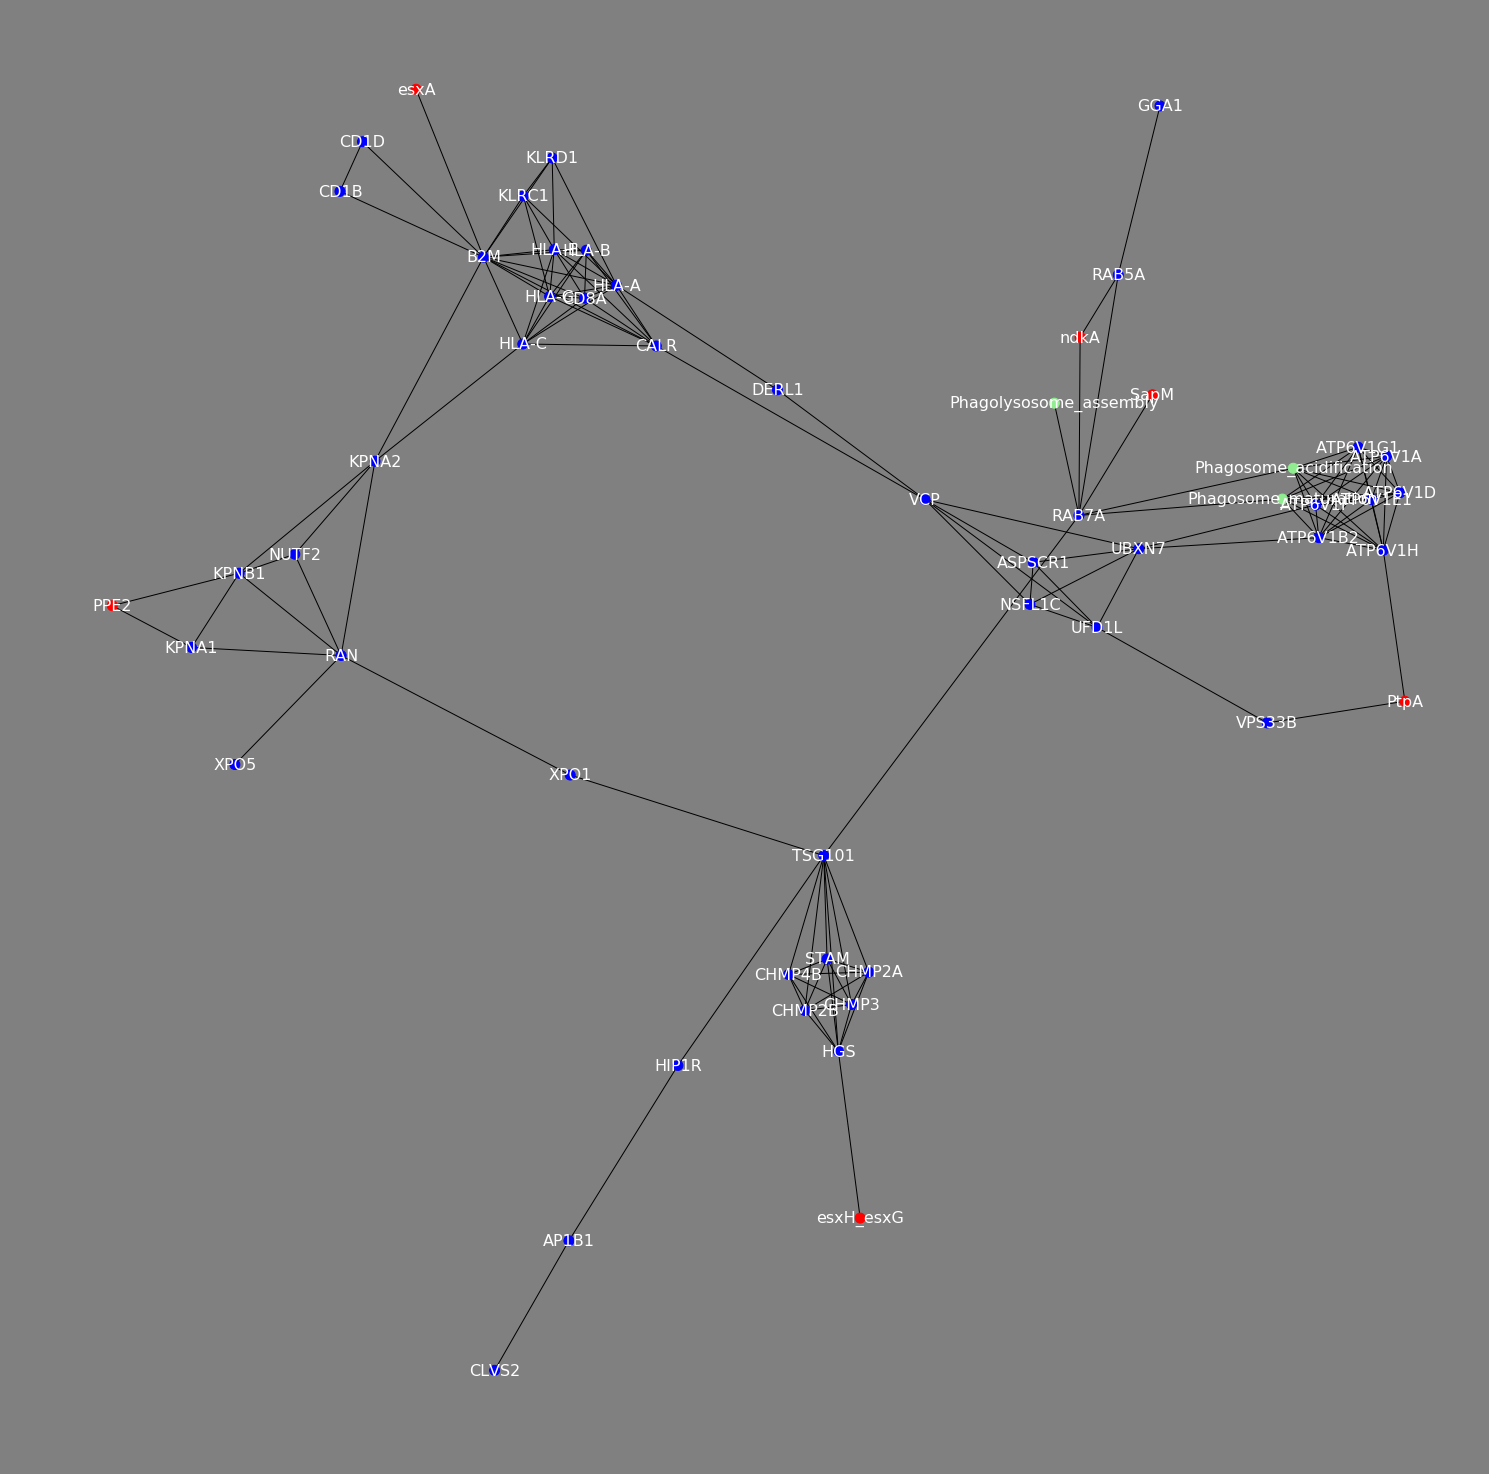

In [31]:
draw.draw_edgelists('string-network-1.csv', add_mtb='mtb-edgelist.csv', add_process='string-1-process-edgelist.csv')

switch on/off complexes

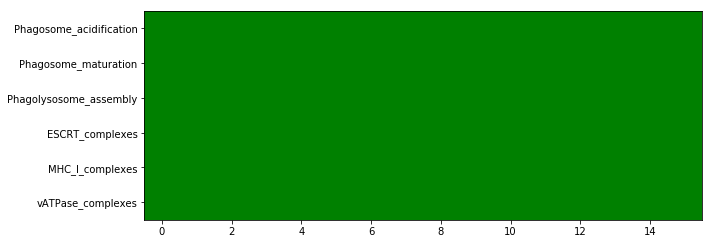

In [20]:
model = bm.run_model(definition)
bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + complexes)

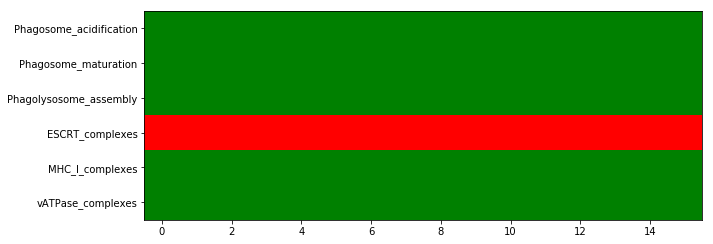

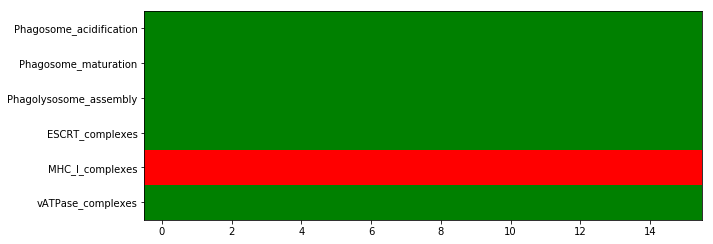

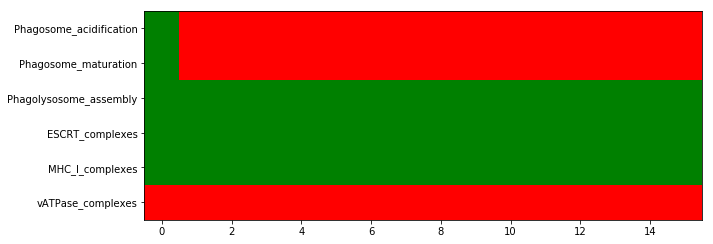

In [23]:
for complex in complexes:
    model = bm.run_model(bm.knockout(definition, [complex]))
    bm.plot_nodes(model, ['Phagosome_acidification','Phagosome_maturation','Phagolysosome_assembly'] + complexes)